### Работу выполнил студент Ногин Д.А. группы 3821Б1ФИ2

#Информация о датасете

Датасет содержит информацию о 19237 автомобилях, предлагаемых на продаже. Каждая запись включает в себя следующие ключевые характеристики:

- **ID**: уникальный идентификатор автомобиля.
- **Цена**: стоимость автомобиля в валюте.
- **Налог**: размер налога.
- **Производитель**: марка автомобиля (например, Lexus, Honda).
- **Модель**: конкретная модель автомобиля.
- **Год выпуска**: год, когда автомобиль был произведен.
- **Категория**: тип автомобиля (например, внедорожник, седан, хэтчбек).
- **Кожаный салон**: информация о наличии кожаного интерьера.
- **Тип топлива**: вид топлива, необходимого для работы двигателя (например, бензин, дизель, гибрид).
- **Объем двигателя**: объем двигателя, указанный в литрах.
- **Пробег**: общее количество километров, пройденных автомобилем.
- **Количество цилиндров**: количество цилиндров в двигателе.
- **Тип коробки передач**: автоматическая или механическая.
- **Привод**: тип привода (например, передний, задний, полный).
- **Количество дверей**: количество дверей у автомобиля.
- **Расположение руля**: информация о том, с какой стороны находится руль.
- **Цвет**: цвет кузова автомобиля.
- **Количество airbags**: количество подушек безопасности.

На основе этого датасета я буду угадывать цену автомобиля (**Price**) по его характеристикам.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_raw = pd.read_csv('car_price_prediction.csv')

In [3]:
data_raw.shape

(19237, 18)

In [4]:
data_raw

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Проверим на наличие нулевых значений:

In [6]:
data_raw = data_raw.replace("-", np.nan)

data_raw.isnull().sum()

,0
ID,0
Price,0
Levy,5819
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


# Удаление ненужные нам данных

Удалим из датасета данные, которые не будут сильно влиять на стоимость автомобиля

В столбце `Levy` слишком много пустых значений, проще будет просто не учитывать его в нашей задаче регрессии

In [7]:
data_raw = data_raw.drop(columns="Levy")

Также удалим `ID` и `Model`, так как они не виляют на стоимость автомобиля

In [8]:
columns_for_remove = ["ID", "Model"]
data_raw = data_raw.drop(columns=columns_for_remove)

Так же удалим `Color`, так как он совсем несущественно влияет на стоимость автомобиля

In [9]:
data_raw = data_raw.drop(columns="Color")

In [10]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Prod. year        19237 non-null  int64  
 3   Category          19237 non-null  object 
 4   Leather interior  19237 non-null  object 
 5   Fuel type         19237 non-null  object 
 6   Engine volume     19237 non-null  object 
 7   Mileage           19237 non-null  object 
 8   Cylinders         19237 non-null  float64
 9   Gear box type     19237 non-null  object 
 10  Drive wheels      19237 non-null  object 
 11  Doors             19237 non-null  object 
 12  Wheel             19237 non-null  object 
 13  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.1+ MB


Убираем символы из столбцов, где они указаны вместе с числовыми данными (Например `km` в столбце `Mileage`) и приведём данные признаки к числовому типу


In [11]:
data_raw["Engine volume"] = data_raw["Engine volume"].str.replace(r"[^\d.]", "", regex=True).astype(float)
data_raw["Mileage"] = data_raw["Mileage"].str.replace(r"[^\d]", "", regex=True).astype(float)

# Считаем квантиль для столбца **Price**



In [12]:
data_raw[["Price", "Mileage"]].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Price,Mileage
0.005,30.0,0.00
0.010,45.0,0.00
0.050,314.0,2313.20
0.100,627.0,25061.40
0.500,13172.0,126000.00
0.900,38609.0,265210.00
0.950,49459.0,320000.00
0.990,84675.0,571246.84
0.995,103491.0,777777.00


# Визуализируем коробчатую диаграмму для столбца **Price**
Отобразим графическое представление, которое отображает распределение данных, включая медиану, квартили и выбросы.

<Axes: >

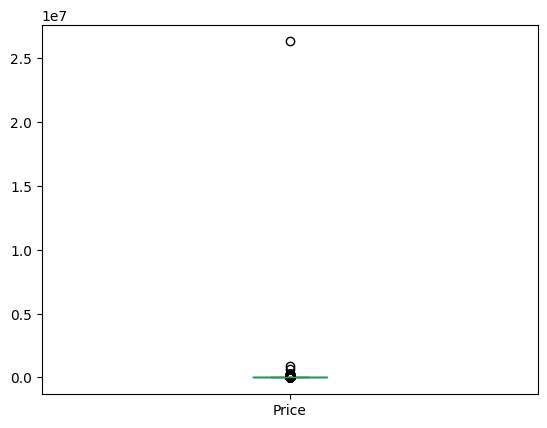

In [13]:
data_raw['Price'].plot(kind='box')

<Axes: >

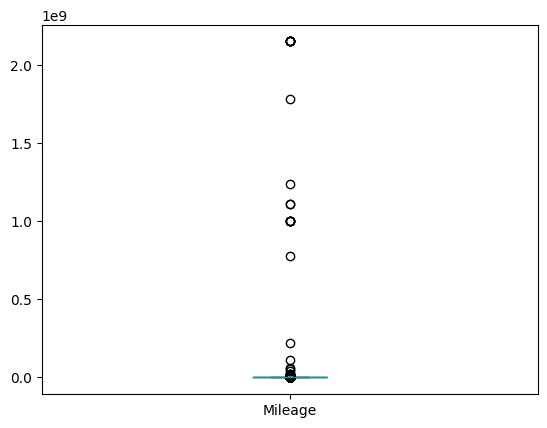

In [14]:
data_raw['Mileage'].plot(kind='box')

<Axes: >

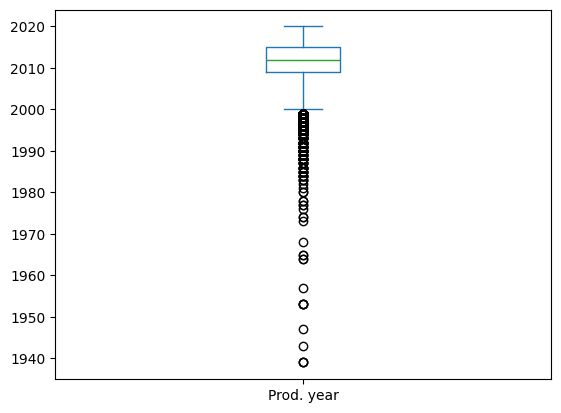

In [15]:
data_raw['Prod. year'].plot(kind='box')

Как мы можем заметить, у нас есть немного выбросов, которые необходимо обработать

# Удалим строки таблицы с выбросами
Удалим строки, в которых значения `Price` и `Mileage` выходят за пределы квантилей 0.05 и 0.95


In [16]:
rows_to_drop = data_raw[
    (data_raw['Price'] < data_raw['Price'].quantile(0.05)) | (data_raw['Price'] > data_raw['Price'].quantile(0.95)) |
    (data_raw['Mileage'] < data_raw['Mileage'].quantile(0.05)) | (data_raw['Mileage'] > data_raw['Mileage'].quantile(0.95)) |
    (data_raw['Prod. year'] < data_raw['Prod. year'].quantile(0.001))].index
data_raw = data_raw.drop(rows_to_drop)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15616 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15616 non-null  int64  
 1   Manufacturer      15616 non-null  object 
 2   Prod. year        15616 non-null  int64  
 3   Category          15616 non-null  object 
 4   Leather interior  15616 non-null  object 
 5   Fuel type         15616 non-null  object 
 6   Engine volume     15616 non-null  float64
 7   Mileage           15616 non-null  float64
 8   Cylinders         15616 non-null  float64
 9   Gear box type     15616 non-null  object 
 10  Drive wheels      15616 non-null  object 
 11  Doors             15616 non-null  object 
 12  Wheel             15616 non-null  object 
 13  Airbags           15616 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 1.8+ MB


Снова выведем коробчатую диаграмму столбцов `Price` и `Mileage`

<Axes: >

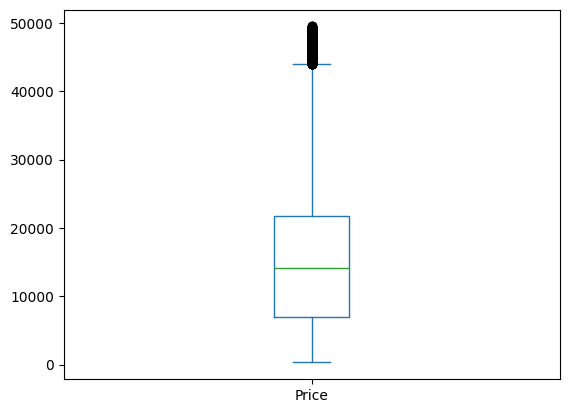

In [17]:
data_raw['Price'].plot(kind='box')

<Axes: >

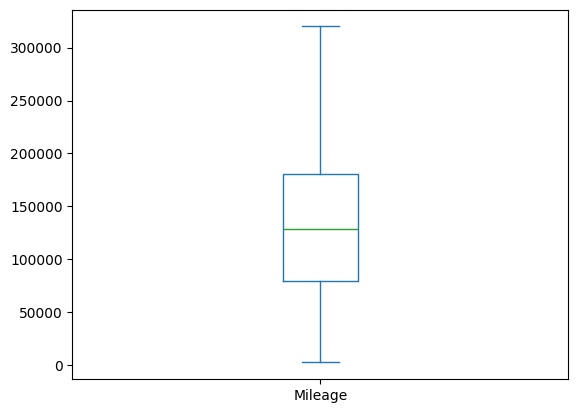

In [18]:
data_raw['Mileage'].plot(kind='box')

<Axes: >

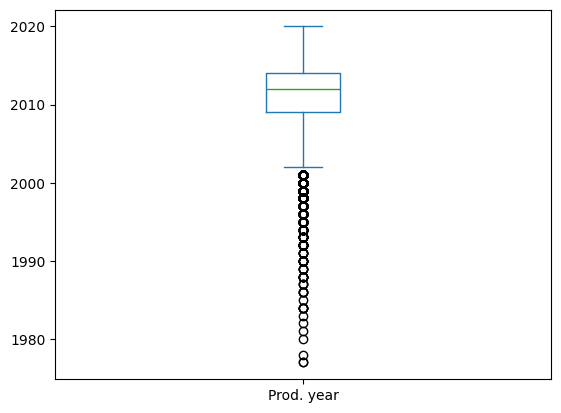

In [19]:
data_raw['Prod. year'].plot(kind='box')

# Визуализируем матрицу рассеивания

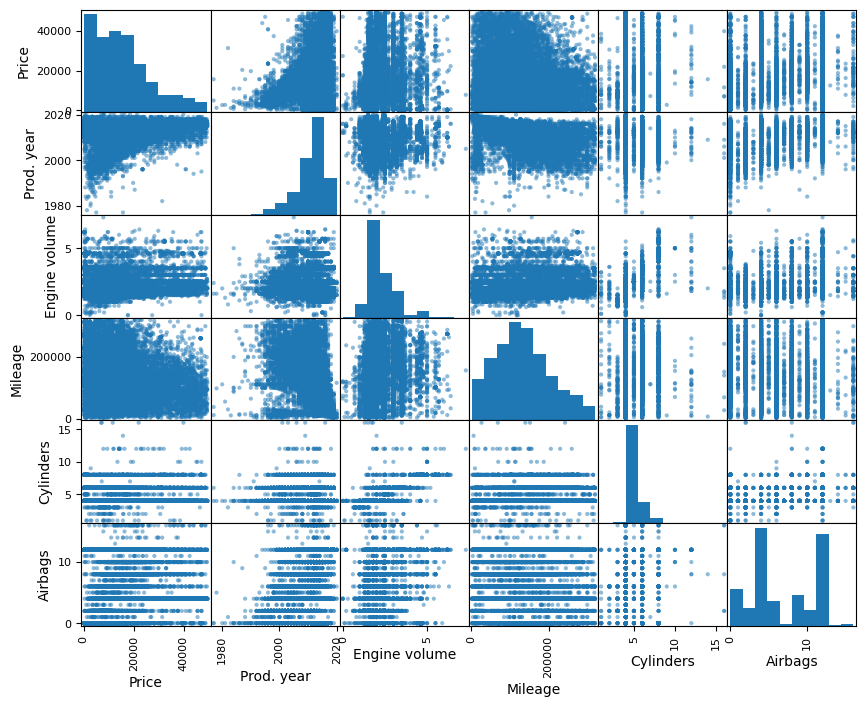

In [20]:
pd.plotting.scatter_matrix(data_raw, figsize=(10, 8))

plt.show()

# Обработка категориальных признаков

Выведем информацию о датасете

In [21]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15616 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15616 non-null  int64  
 1   Manufacturer      15616 non-null  object 
 2   Prod. year        15616 non-null  int64  
 3   Category          15616 non-null  object 
 4   Leather interior  15616 non-null  object 
 5   Fuel type         15616 non-null  object 
 6   Engine volume     15616 non-null  float64
 7   Mileage           15616 non-null  float64
 8   Cylinders         15616 non-null  float64
 9   Gear box type     15616 non-null  object 
 10  Drive wheels      15616 non-null  object 
 11  Doors             15616 non-null  object 
 12  Wheel             15616 non-null  object 
 13  Airbags           15616 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 1.8+ MB


Как мы видим, столбцы `Manufacturer`, `Fuel type`, `Engine volume`, `Milleage`, `Gear box type`, `Drive wheels`, `Doors`, `Wheel`, `Color` имеют тип object


Остальные признаки приведём к категориальному типу

In [22]:
data_raw['Manufacturer'] = data_raw['Manufacturer'].astype('category')
data_raw['Category'] = data_raw['Category'].astype('category')
data_raw['Fuel type'] = data_raw['Fuel type'].astype('category')
data_raw['Gear box type'] = data_raw['Gear box type'].astype('category')
data_raw['Drive wheels'] = data_raw['Drive wheels'].astype('category')
data_raw['Doors'] = data_raw['Doors'].astype('category')
data_raw['Wheel'] = data_raw['Wheel'].astype('category')

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15616 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             15616 non-null  int64   
 1   Manufacturer      15616 non-null  category
 2   Prod. year        15616 non-null  int64   
 3   Category          15616 non-null  category
 4   Leather interior  15616 non-null  object  
 5   Fuel type         15616 non-null  category
 6   Engine volume     15616 non-null  float64 
 7   Mileage           15616 non-null  float64 
 8   Cylinders         15616 non-null  float64 
 9   Gear box type     15616 non-null  category
 10  Drive wheels      15616 non-null  category
 11  Doors             15616 non-null  category
 12  Wheel             15616 non-null  category
 13  Airbags           15616 non-null  int64   
dtypes: category(7), float64(3), int64(3), object(1)
memory usage: 1.1+ MB


Выведем количество уникальных значений для каждого категориального признака

In [23]:
data_raw['Manufacturer'].unique()

['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', ..., 'ROVER', 'UAZ', 'PONTIAC', 'SATURN', 'GREATWALL']
Length: 58
Categories (58, object): ['ACURA', 'ALFA ROMEO', 'AUDI', 'BMW', ..., 'VOLKSWAGEN', 'VOLVO', 'ZAZ',
                          'სხვა']

In [24]:
data_raw['Category'].unique()

['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon', ..., 'Coupe', 'Minivan', 'Cabriolet', 'Limousine', 'Pickup']
Length: 11
Categories (11, object): ['Cabriolet', 'Coupe', 'Goods wagon', 'Hatchback', ..., 'Minivan', 'Pickup',
                          'Sedan', 'Universal']

In [25]:
data_raw['Fuel type'].unique()

['Hybrid', 'Petrol', 'Diesel', 'Plug-in Hybrid', 'CNG', 'LPG', 'Hydrogen']
Categories (7, object): ['CNG', 'Diesel', 'Hybrid', 'Hydrogen', 'LPG', 'Petrol',
                         'Plug-in Hybrid']

In [26]:
data_raw['Gear box type'].unique()

['Automatic', 'Tiptronic', 'Variator', 'Manual']
Categories (4, object): ['Automatic', 'Manual', 'Tiptronic', 'Variator']

In [27]:
data_raw['Drive wheels'].unique()

['4x4', 'Front', 'Rear']
Categories (3, object): ['4x4', 'Front', 'Rear']

In [28]:
data_raw['Doors'].unique()

['04-May', '02-Mar', '>5']
Categories (3, object): ['02-Mar', '04-May', '>5']

In [29]:
data_raw['Wheel'].unique()

['Left wheel', 'Right-hand drive']
Categories (2, object): ['Left wheel', 'Right-hand drive']

В столбцах с двумя категориальными значениями заменим эти значения на 1 и 0.

In [30]:
data_raw.replace({"Leather interior": {"Yes": 1, "No": 0}, "Wheel": {"Left wheel": 1, "Right-hand drive": 0}}, inplace=True)
data_raw["Leather interior"] = data_raw["Leather interior"].astype(int)
data_raw["Wheel"] = data_raw["Wheel"].astype(int)
print(data_raw)

       Price   Manufacturer  Prod. year   Category  Leather interior  \
0      13328          LEXUS        2010       Jeep                 1   
1      16621      CHEVROLET        2011       Jeep                 0   
2       8467          HONDA        2006  Hatchback                 0   
3       3607           FORD        2011       Jeep                 1   
4      11726          HONDA        2014  Hatchback                 1   
...      ...            ...         ...        ...               ...   
19232   8467  MERCEDES-BENZ        1999      Coupe                 1   
19233  15681        HYUNDAI        2011      Sedan                 1   
19234  26108        HYUNDAI        2010       Jeep                 1   
19235   5331      CHEVROLET        2007       Jeep                 1   
19236    470        HYUNDAI        2012      Sedan                 1   

      Fuel type  Engine volume   Mileage  Cylinders Gear box type  \
0        Hybrid            3.5  186005.0        6.0     Automatic 

<ipython-input-30-14d8397d9247>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_raw.replace({"Leather interior": {"Yes": 1, "No": 0}, "Wheel": {"Left wheel": 1, "Right-hand drive": 0}}, inplace=True)
<ipython-input-30-14d8397d9247>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_raw.replace({"Leather interior": {"Yes": 1, "No": 0}, "Wheel": {"Left wheel": 1, "Right-hand drive": 0}}, inplace=True)


Для остальных категориальных признаков применим применим `One-Hot Encoding`: преобразование каждого уникального значения в новый столбец с бинарными значениями (0 или 1), обозначающими наличие категории.

In [31]:
data = pd.get_dummies(data_raw, columns=["Manufacturer", "Category", "Fuel type", "Gear box type", "Drive wheels", "Doors"])
data = data.replace({False: 0, True: 1})

data

<ipython-input-31-9a6cc69fa626>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({False: 0, True: 1})


,Price,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Wheel,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,...,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
0,13328,2010,1,3.5,186005.0,6.0,1,12,0,0,...,1,0,0,0,1,0,0,0,1,0
1,16621,2011,0,3.0,192000.0,6.0,1,8,0,0,...,0,0,1,0,1,0,0,0,1,0
2,8467,2006,0,1.3,200000.0,4.0,0,2,0,0,...,0,0,0,1,0,1,0,0,1,0
3,3607,2011,1,2.5,168966.0,4.0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,11726,2014,1,1.3,91901.0,4.0,1,4,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,1999,1,2.0,300000.0,4.0,1,5,0,0,...,0,1,0,0,0,0,1,1,0,0
19233,15681,2011,1,2.4,161600.0,4.0,1,8,0,0,...,0,0,1,0,0,1,0,0,1,0
19234,26108,2010,1,2.0,116365.0,4.0,1,4,0,0,...,1,0,0,0,0,1,0,0,1,0
19235,5331,2007,1,2.0,51258.0,4.0,1,4,0,0,...,1,0,0,0,0,1,0,0,1,0


# Получаем статистическое описание столбцов

In [32]:
data.describe()

,Price,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Wheel,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,...,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
count,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,...,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000
mean,15623.015753,2011.019787,0.718238,2.263646,134446.716573,4.521965,0.921619,6.656634,0.000704,0.000256,...,0.703701,0.090292,0.163678,0.042328,0.194416,0.691086,0.114498,0.040343,0.953573,0.006084
std,11640.605784,5.120257,0.449872,0.821244,71921.207994,1.136771,0.268779,4.242481,0.026532,0.016003,...,0.456639,0.286609,0.369995,0.201344,0.395763,0.462060,0.318425,0.196769,0.210414,0.077762
min,314.000000,1977.000000,0.000000,0.000000,2336.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6898.250000,2009.000000,0.000000,1.700000,79080.000000,4.000000,1.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,14069.000000,2012.000000,1.000000,2.000000,128202.000000,4.000000,1.000000,6.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21706.750000,2014.000000,1.000000,2.500000,180073.500000,4.000000,1.000000,12.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,49459.000000,2020.000000,1.000000,7.300000,320000.000000,16.000000,1.000000,16.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Построим некоторые графики

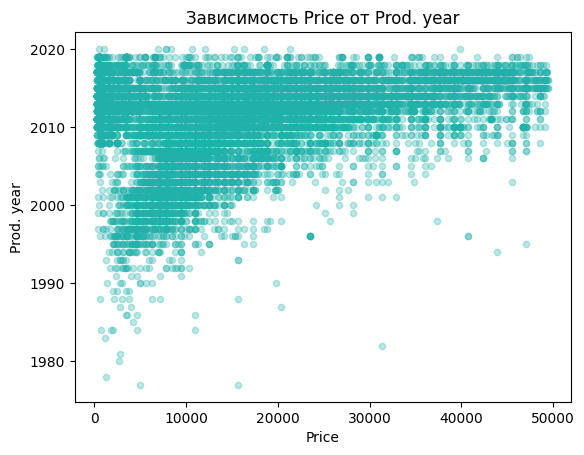

In [33]:
data.plot(kind = 'scatter', x = 'Price', y = 'Prod. year', alpha=.3, color = 'lightseagreen')
plt.title('Зависимость Price от Prod. year')
plt.show()

Можно заметить, что дорогие автомобили в основном новые

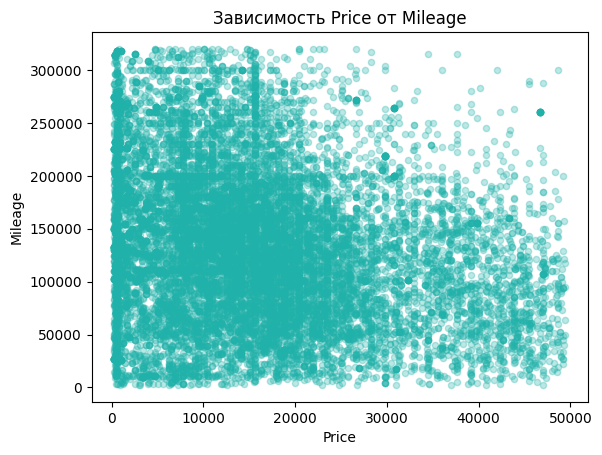

In [34]:
data.plot(kind = 'scatter', x = 'Price', y = 'Mileage', alpha=.3, color = 'lightseagreen')
plt.title('Зависимость Price от Mileage')
plt.show()

Как зависит цена от километража сказать точно нельзя, но дорогих автомобилей с пробегом больше 150000 правктически нет

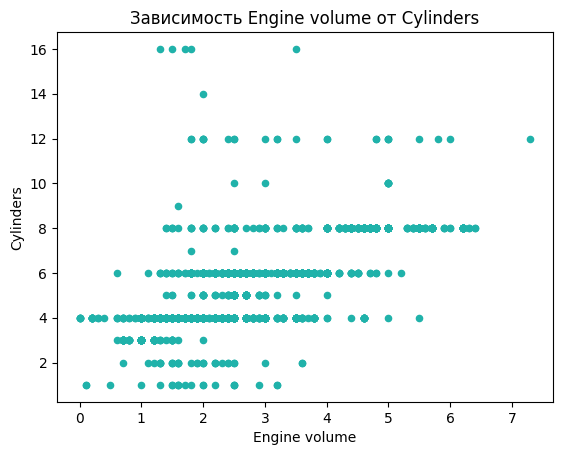

In [35]:
data.plot(kind='scatter', x='Engine volume', y='Cylinders', color = 'lightseagreen')
plt.title('Зависимость Engine volume от Cylinders')
plt.show()

Имеется небольшая зависимость между количесвтом цилиндров и громкостью двигателя

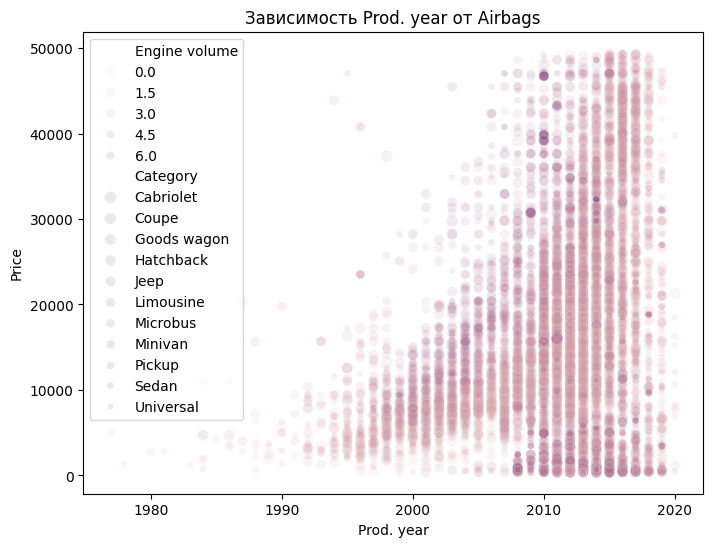

In [36]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x='Prod. year', y='Price', size='Category', hue='Engine volume', data=data_raw, alpha=0.1)
plt.title('Зависимость Prod. year от Airbags')
plt.show()

Просто интересный график

# Подсчитываем среднее значение для каждого признака

In [37]:
mean_values = data.mean()
print("Средние значения:\n", mean_values)

Средние значения:
 Price                  15623.015753
Prod. year              2011.019787
Leather interior           0.718238
Engine volume              2.263646
Mileage               134446.716573
                          ...      
Drive wheels_Front         0.691086
Drive wheels_Rear          0.114498
Doors_02-Mar               0.040343
Doors_04-May               0.953573
Doors_>5                   0.006084
Length: 94, dtype: float64


# Подсчитываем разброс для каждого признака

In [38]:
variance_values = data.var()
print("\nРазброс (дисперсия):\n", variance_values)


Разброс (дисперсия):
 Price                 1.355037e+08
Prod. year            2.621703e+01
Leather interior      2.023853e-01
Engine volume         6.744420e-01
Mileage               5.172660e+09
                          ...     
Drive wheels_Front    2.134998e-01
Drive wheels_Rear     1.013947e-01
Doors_02-Mar          3.871814e-02
Doors_04-May          4.427413e-02
Doors_>5              6.046882e-03
Length: 94, dtype: float64


# Нормализируем данные

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_norm = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data_norm

,Price,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Wheel,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,...,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
0,-0.197162,-0.199174,0.626336,1.505512,0.716895,1.300246,0.291629,1.259531,-0.02655,-0.016007,...,0.648889,-0.315046,-0.442394,-0.210236,2.035586,-1.495710,-0.359587,-0.205035,0.220652,-0.078235
1,0.085736,-0.003865,-1.596587,0.896661,0.800252,1.300246,0.291629,0.316656,-0.02655,-0.016007,...,-1.541095,-0.315046,2.260431,-0.210236,2.035586,-1.495710,-0.359587,-0.205035,0.220652,-0.078235
2,-0.614766,-0.980409,-1.596587,-1.173436,0.911489,-0.459179,-3.429019,-1.097656,-0.02655,-0.016007,...,-1.541095,-0.315046,-0.442394,4.756555,-0.491259,0.668579,-0.359587,-0.205035,0.220652,-0.078235
3,-1.032283,-0.003865,0.626336,0.287809,0.479975,-0.459179,0.291629,-1.569093,-0.02655,-0.016007,...,0.648889,-0.315046,-0.442394,-0.210236,2.035586,-1.495710,-0.359587,-0.205035,0.220652,-0.078235
4,-0.334788,0.582062,0.626336,-1.173436,-0.591579,-0.459179,0.291629,-0.626218,-0.02655,-0.016007,...,0.648889,-0.315046,-0.442394,-0.210236,-0.491259,0.668579,-0.359587,-0.205035,0.220652,-0.078235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,-0.614766,-2.347572,0.626336,-0.321043,2.301944,-0.459179,0.291629,-0.390500,-0.02655,-0.016007,...,-1.541095,3.174142,-0.442394,-0.210236,-0.491259,-1.495710,2.780968,4.877223,-4.532032,-0.078235
15612,0.004981,-0.003865,0.626336,0.166038,0.377554,-0.459179,0.291629,0.316656,-0.02655,-0.016007,...,-1.541095,-0.315046,2.260431,-0.210236,-0.491259,0.668579,-0.359587,-0.205035,0.220652,-0.078235
15613,0.900754,-0.199174,0.626336,-0.321043,-0.251418,-0.459179,0.291629,-0.626218,-0.02655,-0.016007,...,0.648889,-0.315046,-0.442394,-0.210236,-0.491259,0.668579,-0.359587,-0.205035,0.220652,-0.078235
15614,-0.884176,-0.785101,0.626336,-0.321043,-1.156702,-0.459179,0.291629,-0.626218,-0.02655,-0.016007,...,0.648889,-0.315046,-0.442394,-0.210236,-0.491259,0.668579,-0.359587,-0.205035,0.220652,-0.078235


# Строим корреляционную матрицу

In [40]:
correlation_matrix = data_norm.corr()
correlation_matrix

,Price,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Wheel,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,...,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
Price,1.000000,0.284534,0.090947,0.023565,-0.225546,-0.021696,0.145956,-0.085546,-0.018272,-0.007883,...,-0.079290,-0.107407,0.187488,-0.011816,-0.043453,0.053936,-0.024259,-0.029332,0.020237,0.019462
Prod. year,0.284534,1.000000,0.365432,-0.072036,-0.373664,-0.139207,0.247944,0.232413,0.004611,-0.018819,...,0.376382,-0.492158,-0.062895,-0.037463,-0.093169,0.278847,-0.288832,-0.206675,0.209612,-0.044212
Leather interior,0.090947,0.365432,1.000000,0.269948,-0.054913,0.187795,0.343266,0.136774,0.016629,-0.007765,...,0.372621,-0.364920,-0.066490,-0.203448,0.074252,-0.047513,-0.023340,-0.106702,0.112118,-0.033377
Engine volume,0.023565,-0.072036,0.269948,1.000000,0.206028,0.794814,0.179590,0.231108,0.029391,-0.008063,...,0.030208,-0.113360,0.126988,-0.140501,0.468984,-0.577144,0.254592,0.022828,-0.025593,0.011486
Mileage,-0.225546,-0.373664,-0.054913,0.206028,1.000000,0.190280,-0.022735,-0.044690,0.006779,0.007757,...,-0.082006,0.140016,-0.024122,0.031003,0.156994,-0.201918,0.097875,0.026968,-0.026196,0.002643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Drive wheels_Front,0.053936,0.278847,-0.047513,-0.577144,-0.201918,-0.566704,-0.002635,-0.108312,-0.013592,0.010702,...,0.148923,-0.090638,-0.166851,0.097881,-0.734781,1.000000,-0.537838,-0.131988,0.134398,-0.029682
Drive wheels_Rear,-0.024259,-0.288832,-0.023340,0.254592,0.097875,0.268870,0.021809,0.081487,-0.009547,-0.005756,...,-0.234405,0.215818,0.160539,-0.070604,-0.176650,-0.537838,1.000000,0.232902,-0.228430,0.028767
Doors_02-Mar,-0.029332,-0.206675,-0.106702,0.022828,0.026968,0.046141,-0.012860,-0.043013,-0.005444,0.017056,...,-0.184835,0.269260,0.041240,-0.039873,-0.033291,-0.131988,0.232902,1.000000,-0.929224,-0.016041
Doors_04-May,0.020237,0.209612,0.112118,-0.025593,-0.026196,-0.050489,0.013785,0.037883,0.005858,-0.015487,...,0.192745,-0.268176,-0.049630,0.035808,0.026879,0.134398,-0.228430,-0.929224,1.000000,-0.354564


# Визуализируем корреляционную матрицу


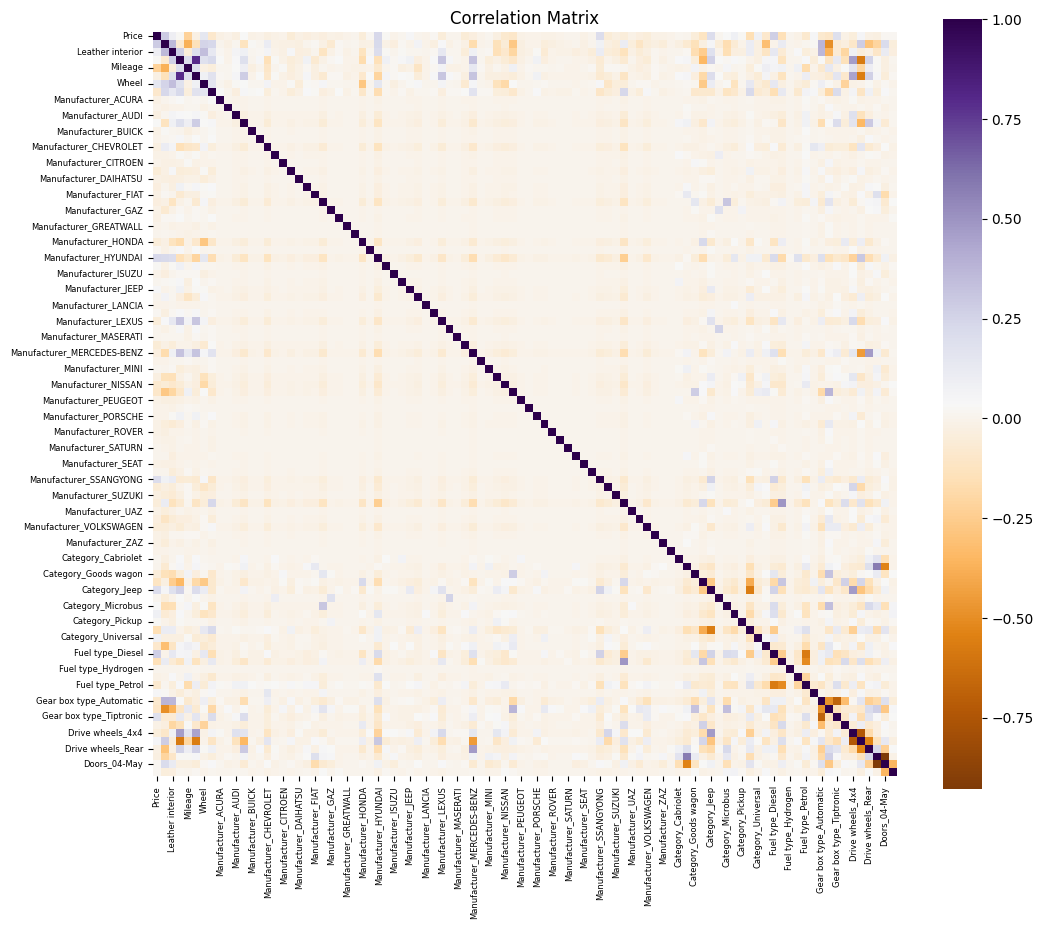

In [41]:
correlation_matrix = data_norm.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, square=True, cmap="PuOr", fmt=".1f")
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.title("Correlation Matrix")
plt.show()

Проанализировав корреляционную матрицу, мы можем увидеть, `Engine volume` имеет положительную корреляция с `Cylinders` и `Drive wheels_4x4`.

В то время как `Prod. year` имеет отрицательную корреляцию с `Mileage`.

Так же мы можем увидеть, что `Price` практически не зависит от `Engine volume` и `Cylinders`.

Так же наглядно виден тот факт, что автомобили с кузовом купе напрямую связан с тем, что автомобиль двухдверный, и с тем, что он не четырёхдверный.

# Разделение данных на обучающую и тестовую выборки

In [42]:
from sklearn.model_selection import train_test_split

X = data_norm.drop(columns=['Price'])
y = data_norm['Price']

# Разделяем данные на обучающую и тестовую выборки (80% для обучения, 20% для тестирования)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape, y_train.shape)
print("Размер тестовой выборки:", X_test.shape, y_test.shape)

Размер обучающей выборки: (12492, 93) (12492,)
Размер тестовой выборки: (3124, 93) (3124,)


In [43]:
type(X)

pandas.core.frame.DataFrame

In [44]:
type(y)

pandas.core.series.Series

 # Запуск регрессии и вычисление ошибок

## Линейная регрессия

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"- - LinearRegression - -\n\n"
      f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

- - LinearRegression - -

RMSE_train - 0.7956575537060798
RMSE_test - 0.7933105943800396
R2_train - 0.3705093115358228
R2_test - 0.35542310657128784



In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"- KNeighborsRegressor -\n\n"
      f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

- KNeighborsRegressor -

RMSE_train - 0.4703251030424388
RMSE_test - 0.5754422453801047
R2_train - 0.7800452989006077
R2_test - 0.6608500881644304



# Случайный лес

In [47]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"- RandomForestRegressor -\n\n"
      f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

- RandomForestRegressor -

RMSE_train - 0.20719835535346046
RMSE_test - 0.4851500629816086
R2_train - 0.9573116333880924
R2_test - 0.758931531484288



Как мы можем заметить, Линейная регрессия совершенно не справляется с таким набором данных, а лучше всего предсказывает метод Случайный лес, поэтому подберём для него оптимальные гиперпараметры и прогоним его ещё раз

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

n_arr = np.array([50, 100, 150, 200, 250])

ppl = Pipeline([('fit', RandomForestRegressor())])

params = {
    'fit__n_estimators': n_arr,
}

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

(-0.2557647100875109, {'fit__n_estimators': 250})

Text(0, 0.5, 'MSE')

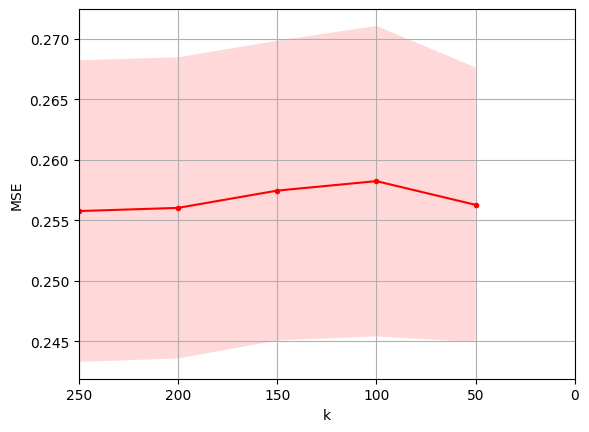

In [49]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.plot(n_arr, MSE_arr, 'r.-')
plt.fill_between(n_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(n_arr), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')

In [50]:
model.best_params_['fit__n_estimators']

250

Запустим регрессию случайный лес с подобранным гиперпараметром

In [51]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=model.best_params_['fit__n_estimators'])
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f"- - - - Results - - - -\n\n"
      f"RMSE_train - {RMSE_train}\n"
      f"RMSE_test - {RMSE_test}\n"
      f"R2_train - {R2_train}\n"
      f"R2_test - {R2_test}\n")

- - - - Results - - - -

RMSE_train - 0.205696300074995
RMSE_test - 0.4844606716823536
R2_train - 0.9579283165736259
R2_test - 0.759616154409137



Благодаря методу случайный лес можно получить оценки важности признаков. Чем значение больше, тем признак важнее

In [52]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

,0
Prod. year,2.604778e-01
Mileage,1.575607e-01
Airbags,9.464294e-02
Engine volume,9.010486e-02
Fuel type_Diesel,7.760614e-02
...,...
Manufacturer_SEAT,3.876227e-07
Manufacturer_LANCIA,3.146013e-07
Fuel type_Hydrogen,0.000000e+00
Manufacturer_HAVAL,0.000000e+00


Визуализируем эти данные

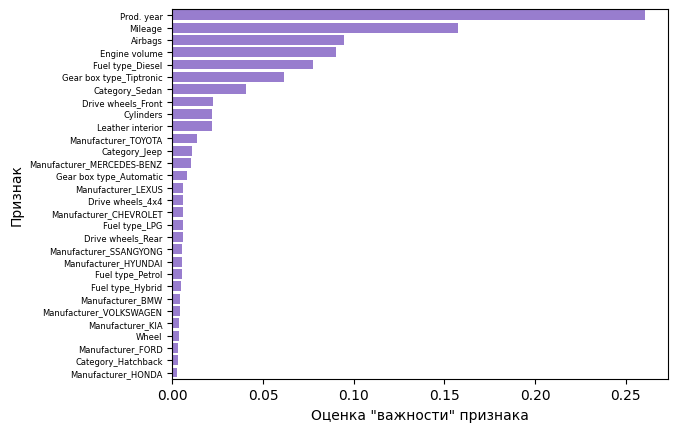

In [53]:
top_importances = importances.head(30)

sns.barplot(y=top_importances.index, x=top_importances, orient="h", color = 'mediumpurple')
plt.xlabel('Оценка "важности" признака')
plt.yticks(fontsize=6)
plt.ylabel('Признак')
plt.show()

# График фактических значений против предсказанных

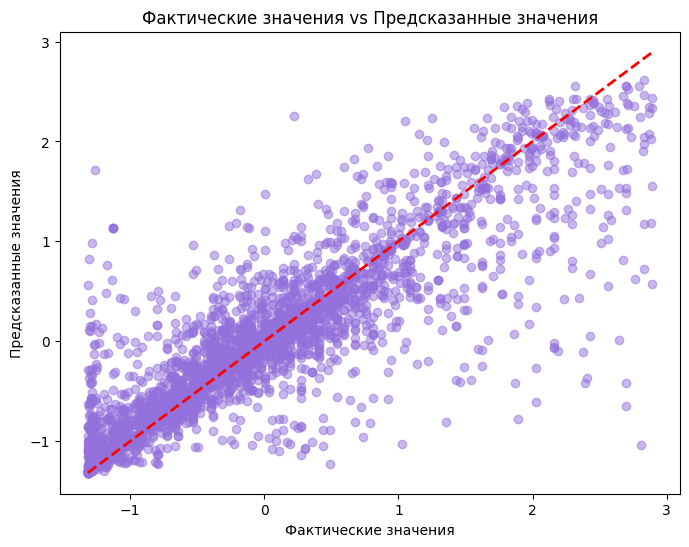

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predict, alpha=0.5, color = 'mediumpurple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические значения vs Предсказанные значения")
plt.show()

# График ошибок (Residual Plot)

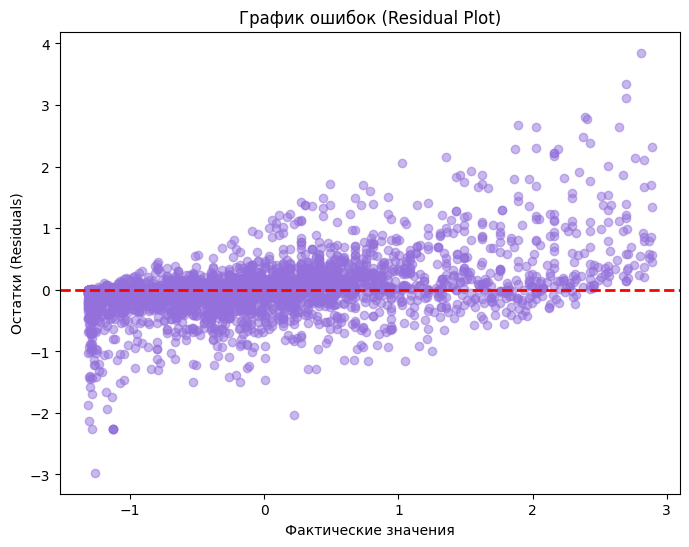

In [55]:
residuals = y_test - y_test_predict

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5, color = 'mediumpurple')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Остатки (Residuals)")
plt.title("График ошибок (Residual Plot)")
plt.show()

# Гистограмма ошибок (распределение остатков)

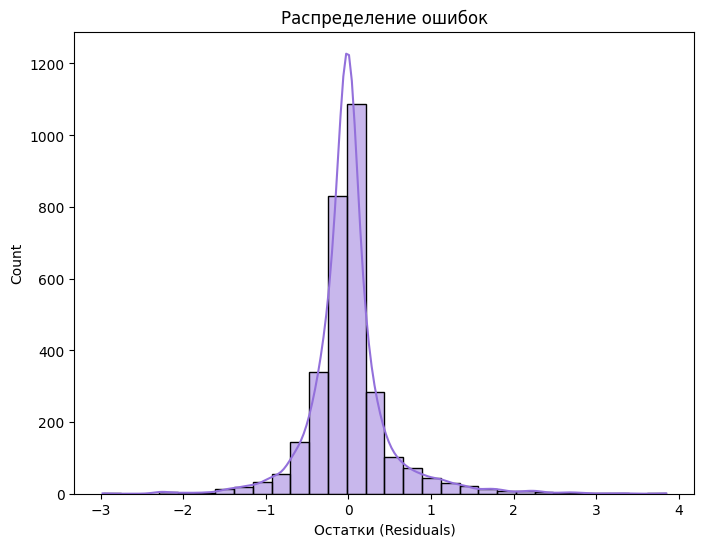

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color = 'mediumpurple')
plt.xlabel("Остатки (Residuals)")
plt.title("Распределение ошибок")
plt.show()

# Вывод по лабораторной работе

## Анализ результатов регрессий на данных о ценах на автомобили
Я провёл обучение трёх моделей регрессии: линейной регрессии, kNN-регрессии и случайного леса. Вот ключевые выводы по каждой модели:

### 1. Линейная регрессия:

- RMSE_train: 0.7919
- RMSE_test: 890258511842.6542
- R²_train: 0.3697
- R²_test: -7.77e+23

**Вывод**: Линейная регрессия показала крайне неудовлетворительные результаты. Очень высокий RMSE на тестовой выборке и отрицательное значение R² указывают на то, что модель совершенно не справляется с задачей предсказания цен на автомобили. Отрицательный R² свидетельствует о том, что модель предсказывает хуже, чем простое среднее значение. Это может быть связано с тем, что данные имеют нелинейные зависимости или сильные выбросы, с которыми линейная модель не справляется.

### 2. kNN-регрессия:

- RMSE_train: 0.4680
- RMSE_test: 0.6041
- R²_train: 0.780
- R²_test: 0.6422

**Вывод**: kNN-регрессия показывает значительно лучшие результаты по сравнению с линейной регрессией. Значения R² указывают на то, что модель объясняет около 78% вариации данных на обучающей выборке и 64% на тестовой. Разница в показателях между обучающей и тестовой выборками намекает на некоторое переобучение, но в целом модель демонстрирует неплохую способность к предсказанию.

### 3. Случайный лес (до настройки гиперпараметров):

- RMSE_train: 0.2025
- RMSE_test: 0.5005
- R²_train: 0.9587
- R²_test: 0.7544

**Вывод**: Случайный лес уже в базовой версии значительно превосходит как линейную регрессию, так и kNN-регрессию. Модель хорошо объясняет данные: R² на обучающей выборке составляет 95.9%, а на тестовой — 75.7%, что указывает на довольно высокую точность предсказаний с некоторыми признаками переобучения.

### 4. Случайный лес (после настройки гиперпараметров):

- RMSE_train: 0.1993
- RMSE_test: 0.4964
- R²_train: 0.9601
- R²_test: 0.7584

**Вывод**: Настройка гиперпараметра n_estimators для случайного леса привела к небольшому улучшению производительности модели. Показатели R² увеличились до 96.0% на обучающей выборке и 75.9% на тестовой выборке, а RMSE уменьшился, что указывает на улучшение качества предсказаний. Модель остаётся высокоэффективной, и различие между обучающей и тестовой выборками минимально, что свидетельствует об адекватной генерализации.

# Домашнаяя работа (продолжение)

Подчистить и исправить все, что было сделано в домашнем задании для 2 ноября. С теми же данными - решить задачу кластеризации 3 методами: KMeans, DBSCAN и любым другим на ваш выбор. В задаче обучения с учителем вы не должны использовать целевую метку y. В случае задачи классификации сравнить выход каждого алгоритма кластеризации с истинными метками. Сделать выводы.

### Кластеризация методом KMeans

Подберём гиперпараметры

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import make_scorer

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

parameters = {'n_clusters': list(range(80, 101))}
km = KMeans()
clf = GridSearchCV(km, parameters)
clf.fit(X)
clusters_kmeans = clf.best_params_['n_clusters']
clf.best_params_

{'n_clusters': 99}

In [58]:
kmeans = KMeans(n_clusters=clusters_kmeans, random_state=42)
data_norm['KMeans_Cluster'] = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, data_norm['KMeans_Cluster'])
print(f"Силуэтный коэффициент для KMeans: {silhouette_kmeans}")

Силуэтный коэффициент для KMeans: 0.35982047115832533


Визуализируем кластеры KMeans

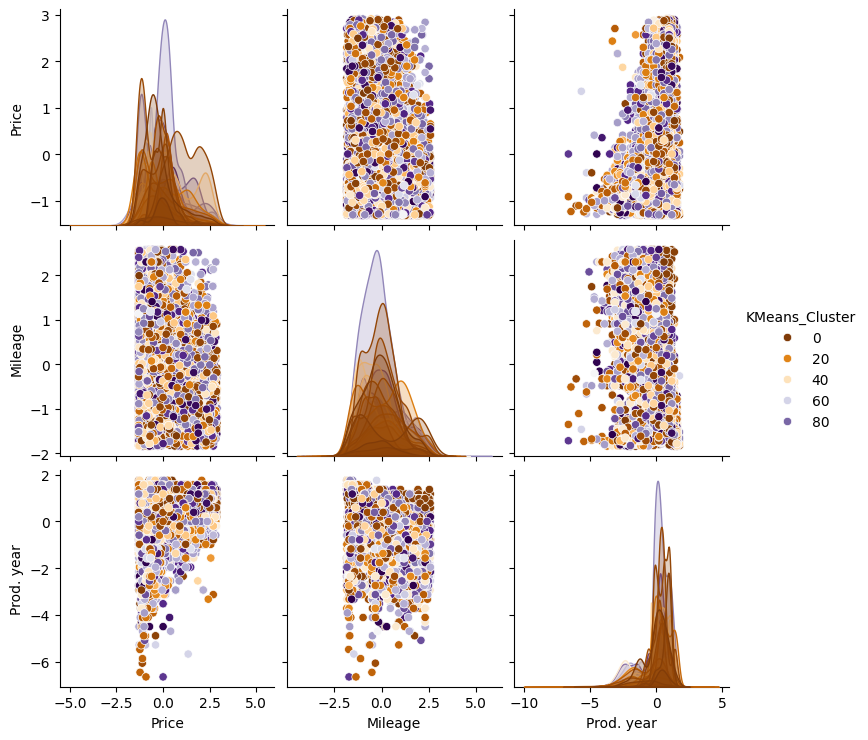

In [59]:
sns.pairplot(data_norm, vars=['Price', 'Mileage', 'Prod. year'], hue='KMeans_Cluster', palette='PuOr')
plt.show()

Визуализируем средний силуэтный коэффициент для каждого кластера

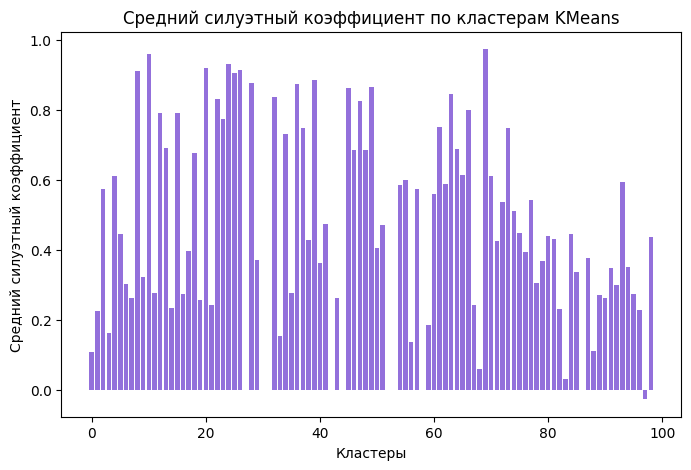

In [60]:
labels = kmeans.labels_
silhouette_vals = silhouette_samples(X, labels)

n_clusters = len(set(labels))
silhouette_means = [np.mean(silhouette_vals[labels == i]) for i in range(n_clusters)]

plt.figure(figsize=(8, 5))
plt.bar(range(n_clusters), silhouette_means, color='mediumpurple')
plt.xlabel('Кластеры')
plt.ylabel('Средний силуэтный коэффициент')
plt.title('Средний силуэтный коэффициент по кластерам KMeans')
plt.show()

### Кластеризация методом DBSCAN

Подберём гиперпараметры

In [61]:
from sklearn.cluster import DBSCAN
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1:
        return silhouette_score(X, labels)
    else:
        return -1
parameters = {
    'eps': [0.5, 1.0, 1.5],
    'min_samples': [5, 10]
}
dbscan = DBSCAN()
clf_dbscan = GridSearchCV(dbscan, parameters, scoring=make_scorer(silhouette_scorer))
clf_dbscan.fit(X)
eps_dbscan = clf_dbscan.best_params_['eps']
min_samples_dbscan = clf_dbscan.best_params_['min_samples']
clf_dbscan.best_params_

{'eps': 1.5, 'min_samples': 10}

In [62]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=eps_dbscan, min_samples=min_samples_dbscan)
data_norm['DBSCAN_Cluster'] = dbscan.fit_predict(X)
silhouette_dbscan = silhouette_score(X, data_norm['DBSCAN_Cluster'])
print(f"Силуэтный коэффициент для DBSCAN: {silhouette_dbscan}")

Силуэтный коэффициент для DBSCAN: 0.2040590421706874


Визуализируем кластеры DBSCAN

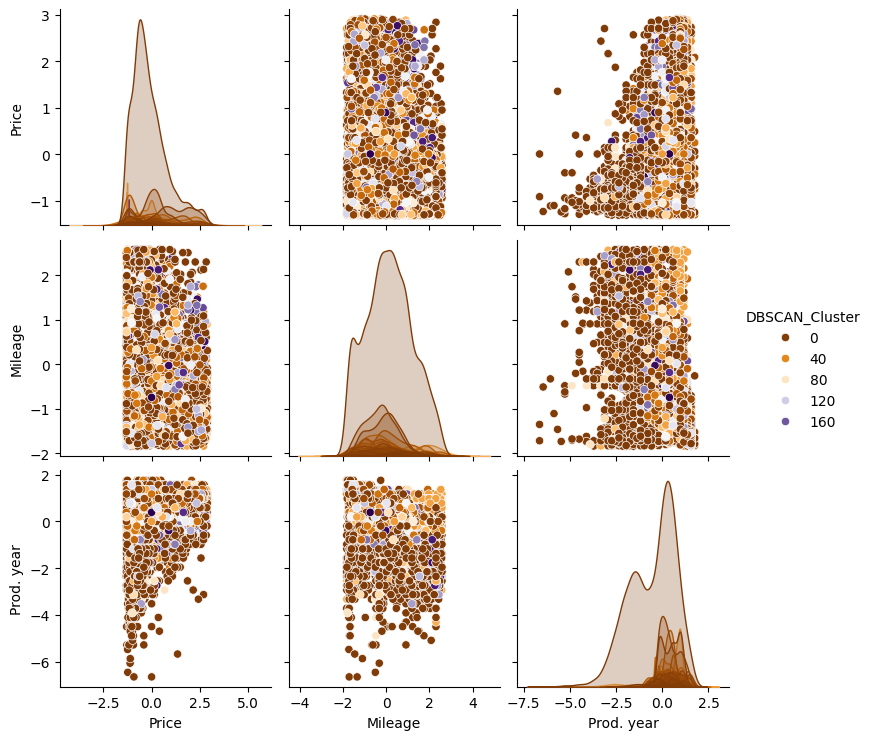

In [63]:
sns.pairplot(data_norm, vars=['Price', 'Mileage', 'Prod. year'], hue='DBSCAN_Cluster', palette='PuOr')
plt.show()

Визуализируем средний силуэтный коэффициент для каждого кластера

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


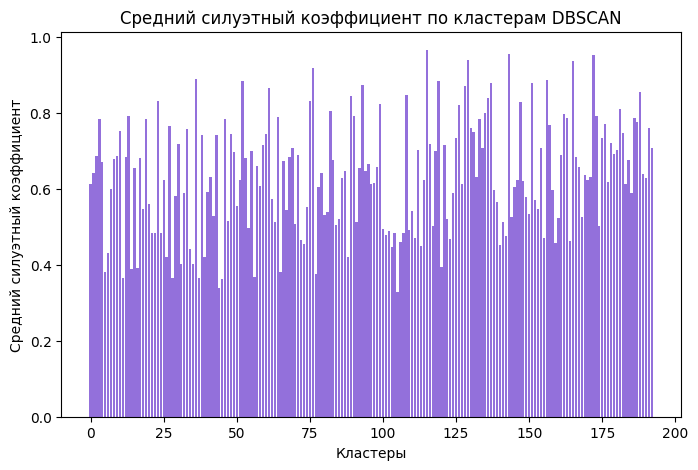

In [64]:
labels = dbscan.labels_
silhouette_vals = silhouette_samples(X, labels)

n_clusters = len(set(labels))
silhouette_means = [np.mean(silhouette_vals[labels == i]) for i in range(n_clusters)]

plt.figure(figsize=(8, 5))
plt.bar(range(n_clusters), silhouette_means, color='mediumpurple')
plt.xlabel('Кластеры')
plt.ylabel('Средний силуэтный коэффициент')
plt.title('Средний силуэтный коэффициент по кластерам DBSCAN')
plt.show()

### Кластеризация методом Agglomerative Clustering

Подберём гиперпараметры

In [65]:
from sklearn.cluster import AgglomerativeClustering

parameters = {
    'n_clusters': list(range(95, 101))
}

agg_clustering = AgglomerativeClustering()

clf_agg = GridSearchCV(agg_clustering, parameters, scoring=make_scorer(silhouette_scorer))
clf_agg.fit(X)
clusters_agg = clf_agg.best_params_['n_clusters']
clf_agg.best_params_

{'n_clusters': 98}

In [66]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=clusters_agg)
data_norm['Agglomerative_Cluster'] = agg_clustering.fit_predict(X)
silhouette_agg = silhouette_score(X, data_norm['Agglomerative_Cluster'])
print(f"Силуэтный коэффициент для Agglomerative Clustering: {silhouette_agg}")

Силуэтный коэффициент для Agglomerative Clustering: 0.36198804488269926


Визуализация кластеров Agglomerative Clustering

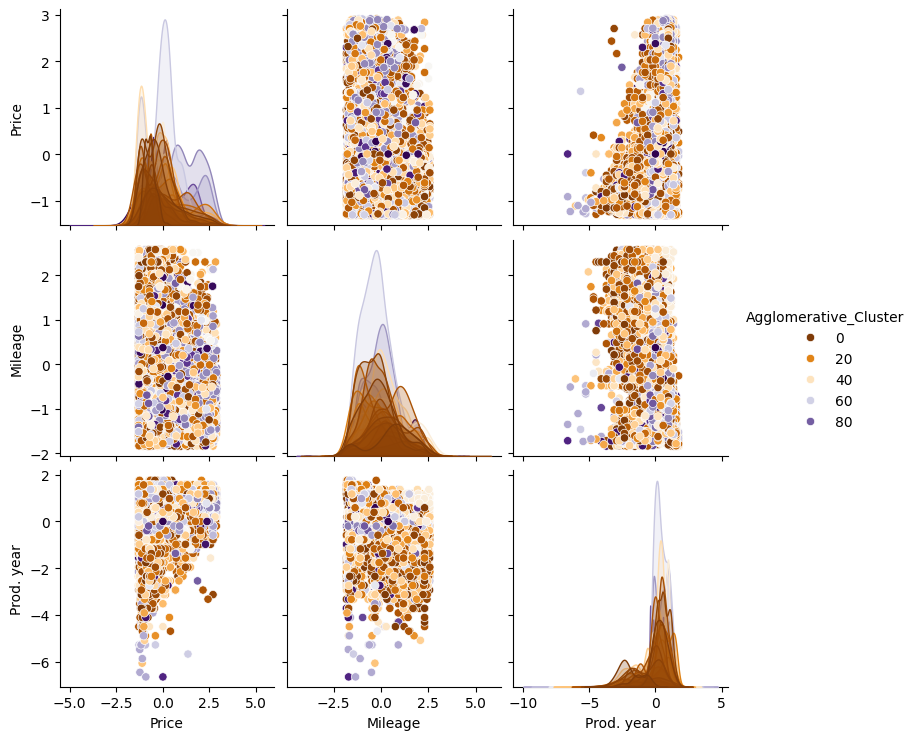

In [67]:
sns.pairplot(data_norm, vars=['Price', 'Mileage', 'Prod. year'], hue='Agglomerative_Cluster', palette='PuOr')
plt.show()

Визуализируем средний силуэтный коэффициент для каждого кластера

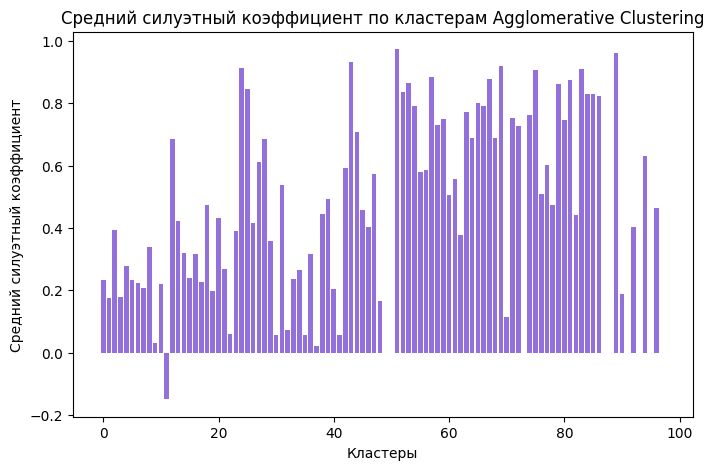

In [68]:
labels = agg_clustering.labels_
silhouette_vals = silhouette_samples(X, labels)

n_clusters = len(set(labels))
silhouette_means = [np.mean(silhouette_vals[labels == i]) for i in range(n_clusters)]

plt.figure(figsize=(8, 5))
plt.bar(range(n_clusters), silhouette_means, color='mediumpurple')
plt.xlabel('Кластеры')
plt.ylabel('Средний силуэтный коэффициент')
plt.title('Средний силуэтный коэффициент по кластерам Agglomerative Clustering')
plt.show()

### Вывод
Силуэтный коэффициент (Silhouette score) измеряет качество кластеризации, отражая, насколько хорошо каждый объект соответствует своему кластеру по сравнению с соседними кластерами. Значения находятся в диапазоне от -1 до 1:

* Близко к 1: Объекты хорошо соответствуют своему кластеру и удалены от других кластеров.
* Близко к 0: Объекты находятся на границе между кластерами.
* Отрицательное значение: Объекты, возможно, распределены неверно, так как ближе к другому кластеру.

Полученные коэффициенты:
```
KMeans: 0.351
DBSCAN: 0.205
AgglomerativeClustering: 0.363
```
#### Подытожим:
Все три метода дают положительный силуэтный коэффициент, что говорит о разумной кластеризации.
Однако значения находятся ближе к 0, что указывает на умеренное качество кластеризации. Кластеры либо перекрываются, либо данные не имеют четко выраженной кластерной структуры.

AgglomerativeClustering показывает самый высокий силуэтный коэффициент (0.363), что указывает на наилучшее разделение кластеров среди методов. Это может быть связано с тем, что метод иерархической кластеризации лучше подходит для данных без четко выраженного количества кластеров.
KMeans находится на втором месте (0.351) и демонстрирует схожее качество. Это ожидаемо, так как KMeans хорошо работает для данных с четкими и сферическими кластерами.
DBSCAN имеет самый низкий силуэтный коэффициент (0.205), что может говорить о сложности разделения данных этим методом.